In [1]:
import numpy
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten
from keras.constraints import maxnorm
from keras.utils import np_utils

In [2]:
seed=21   ####Random seed for purpose of reproductibility 

In [3]:
from keras.datasets import cifar10

In [4]:
# Loading the data 

(x_train, y_train),(x_test, y_test)=cifar10.load_data()

In [5]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [6]:
# Normalization Need to be done 

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0

In [7]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
class_num=y_test.shape[1]

In [8]:
model=Sequential()

In [9]:
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [10]:
# Convolution Layer
model.add(Conv2D(32,(3,3),input_shape=x_train.shape[1:],padding='same'))
model.add(Activation('relu'))
#zero padding done

In [11]:
model.add(Dropout(0.2))

In [12]:
model.add(BatchNormalization())

In [13]:
# Now comes another convoultion layer

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))

In [14]:
# now with pooling layer

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [15]:
# Repeating the same 
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


In [16]:
# Need to flatter for 1D 

model.add(Flatten())
model.add(Dropout(0.2))

In [17]:
model.add(Dense(256,kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Dense(256,kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [18]:
model.add(Dense(class_num))
model.add(Activation('softmax'))


In [19]:
epochs=25
optimizer='adam'

In [20]:
model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0

In [22]:
numpy.random.seed(seed)
result=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=64)

Epoch 1/25
782/782 [==============================] - 56s 26ms/step - loss: 1.8983 - accuracy: 0.3478 - val_loss: 1.5709 - val_accuracy: 0.4681
Epoch 2/25
782/782 [==============================] - 19s 24ms/step - loss: 1.1955 - accuracy: 0.5678 - val_loss: 1.0174 - val_accuracy: 0.6410
Epoch 3/25
782/782 [==============================] - 19s 24ms/step - loss: 0.9695 - accuracy: 0.6572 - val_loss: 0.8462 - val_accuracy: 0.6998
Epoch 4/25
782/782 [==============================] - 19s 24ms/step - loss: 0.8408 - accuracy: 0.7005 - val_loss: 0.7504 - val_accuracy: 0.7379
Epoch 5/25
782/782 [==============================] - 18s 23ms/step - loss: 0.7625 - accuracy: 0.7328 - val_loss: 0.6916 - val_accuracy: 0.7576
Epoch 6/25
782/782 [==============================] - 18s 23ms/step - loss: 0.7188 - accuracy: 0.7453 - val_loss: 0.6373 - val_accuracy: 0.7748
Epoch 7/25
782/782 [==============================] - 19s 24ms/step - loss: 0.6599 - accuracy: 0.7660 - val_loss: 0.6824 - val_accuracy:

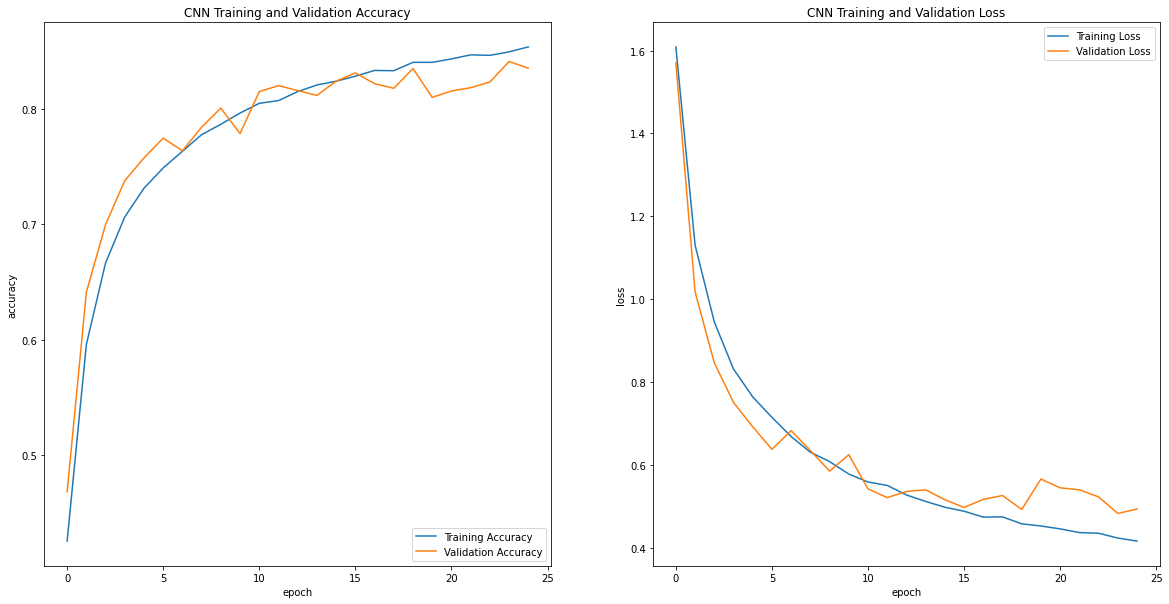

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("CNN Training and Validation Accuracy")
plt.plot(result.history["accuracy"], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.plot( result.history["loss"], label='Training Loss')
plt.plot( result.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [24]:

# check performance on test
scores = model.evaluate(x_test, y_test, verbose=1) 
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.4928 - accuracy: 0.8354
Test loss: 0.4928478002548218
Test accuracy: 0.8353999853134155
